In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Read CSV file from Google Drive
filename = '/content/gdrive/MyDrive/job preparation/data/' +\
              'yield-curve-rates-1990-2021.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the yield curve data from a CSV file
data = pd.read_csv(filename, header=0, index_col=0)
data.index = pd.to_datetime(data.index)
data.describe()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,5108.000000,803.000000,8004.000000,0.0,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,7068.000000,7013.000000
mean,1.189280,0.933200,2.617776,NaN,2.742755,2.864224,3.155971,3.369076,3.759111,4.064312,4.300784,4.399849,4.825775
std,1.454355,1.017538,2.300515,NaN,2.338706,2.342819,2.372302,2.328102,2.223877,2.138821,2.037001,1.721233,1.975046
min,0.000000,0.000000,0.000000,NaN,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.060000,0.060000,0.160000,NaN,0.260000,0.430000,0.810000,1.150000,1.710000,2.140000,2.495000,2.790000,3.040000
50%,0.510000,0.120000,2.100000,NaN,2.180000,2.390000,2.740000,2.970000,3.510000,3.890000,4.220000,4.570000,4.660000
75%,1.800000,2.070000,4.930000,NaN,5.070000,5.050000,5.240000,5.420000,5.650000,5.850000,5.900000,5.760000,6.390000
max,5.270000,2.480000,8.260000,NaN,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,8.300000,9.180000


In [4]:
# Compute daily changes in yield curve
df = data.diff(periods=-1, axis=0)
df.describe()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,5106.000000,802.000000,7999.000000,0.0,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,7066.000000,7010.000000
mean,-0.000707,-0.002706,-0.000968,NaN,-0.000963,-0.000927,-0.000894,-0.000872,-0.000829,-0.000819,-0.000806,-0.000599,-0.000755
std,0.061069,0.023861,0.047038,NaN,0.040366,0.042736,0.053325,0.056430,0.059466,0.059645,0.057044,0.054296,0.052351
min,-1.050000,-0.220000,-0.810000,NaN,-0.490000,-0.500000,-0.540000,-0.500000,-0.460000,-0.530000,-0.510000,-0.340000,-0.330000
25%,-0.010000,-0.010000,-0.010000,NaN,-0.010000,-0.020000,-0.030000,-0.030000,-0.030000,-0.040000,-0.030000,-0.030000,-0.030000
50%,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,NaN,0.010000,0.010000,0.020000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
max,0.860000,0.100000,0.760000,NaN,0.750000,0.520000,0.380000,0.400000,0.410000,0.420000,0.390000,0.350000,0.320000


In [5]:
# Drop the columns with too many missing values
df = df.drop(['1 Mo','2 Mo','4 Mo'], axis=1)

# Drop the indexes with missing values
df = df.dropna()

df.describe()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000
mean,-0.000935,-0.000932,-0.000890,-0.000786,-0.000714,-0.000608,-0.000562,-0.000562,-0.000533,-0.000519
std,0.050014,0.041088,0.041386,0.050995,0.054343,0.058304,0.059411,0.056928,0.054301,0.052720
min,-0.810000,-0.490000,-0.500000,-0.540000,-0.500000,-0.460000,-0.530000,-0.510000,-0.340000,-0.330000
25%,-0.010000,-0.010000,-0.010000,-0.020000,-0.030000,-0.030000,-0.030000,-0.030000,-0.030000,-0.030000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,0.020000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
max,0.760000,0.750000,0.520000,0.380000,0.400000,0.410000,0.420000,0.390000,0.350000,0.320000


In [6]:
# Split the data into pre and post 2008 crisis subsets
df_pre, df_post = df[df.index < '2007/07/01'], df[df.index > '2009/07/01']

In [7]:
class Analysis:

  def __init__(self, df, df_title, n=10):
    self.df = df
    self.n = n
    self.df_title = df_title
    self.scaler = StandardScaler()
    self.pca = PCA(n_components = self.n)

  def fit(self):
    # Normalize the data
    df_normalized = self.scaler.fit_transform(self.df)
    # Perform PCA
    self.pca.fit(df_normalized)

  def plot_explained_variance_ratio(self):
    # Explained variance ratio
    arr_explained_variance_ratio = self.pca.explained_variance_ratio_

    # Plot explained variance ratio
    print(np.cumsum(arr_explained_variance_ratio))
    plt.plot(np.arange(1,self.n+1), np.cumsum(arr_explained_variance_ratio))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance Ratio')
    plt.xticks(np.arange(1,self.n+1))
    plt.show()

  def plot_components(self, k=3):
    idx = 1
    for component in self.scaler.inverse_transform(self.pca.components_[:k]):
      plt.plot(self.df.columns, component, label=f'PC{idx}')
      idx +=1
    plt.xlabel('Time to Maturity')
    plt.ylabel('Changes in Rate')
    plt.title(f'{self.df_title} Principal Components')
    plt.xticks(self.df.columns)
    plt.legend(loc='lower right')
    plt.show()


[0.71979432 0.892549   0.94681984 0.96964369 0.98208477 0.98979297
 0.99363556 0.99609077 0.99811131 1.        ]


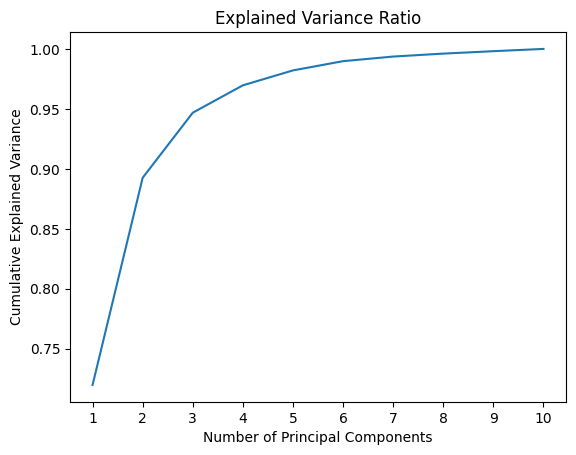

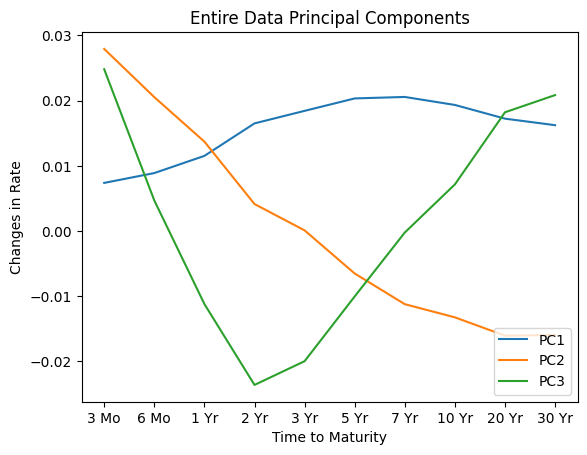

In [8]:
# Analyze the entire data
analysis = Analysis(df, 'Entire Data', 10)
analysis.fit()
analysis.plot_explained_variance_ratio()
analysis.plot_components()

[0.78214885 0.91696857 0.9565723  0.97343035 0.98341765 0.98908167
 0.99258209 0.99533658 0.99781906 1.        ]


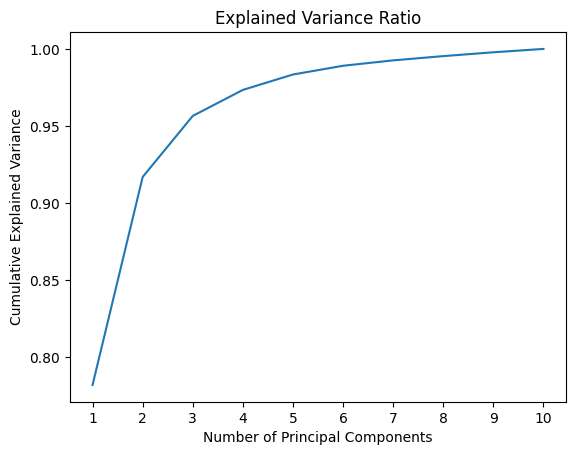

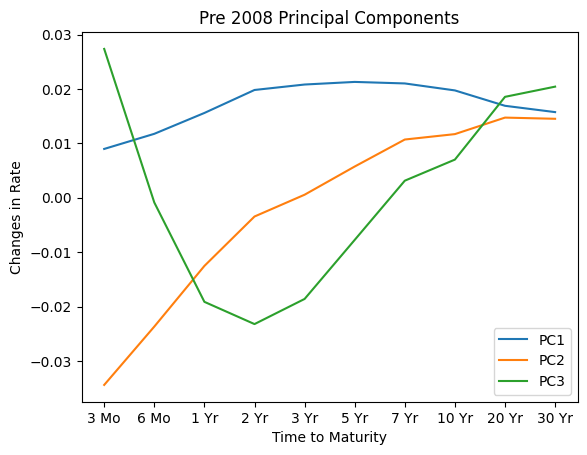

In [9]:
# Analyze the pre 2008 subset
analysis_pre = Analysis(df_pre,'Pre 2008',10)
analysis_pre.fit()
analysis_pre.plot_explained_variance_ratio()
analysis_pre.plot_components()

[0.65137826 0.82774095 0.90287307 0.94424017 0.97599295 0.98934228
 0.99487017 0.99707981 0.99865753 1.        ]


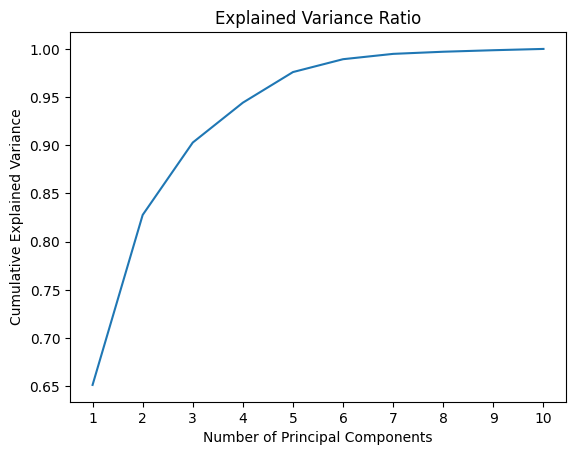

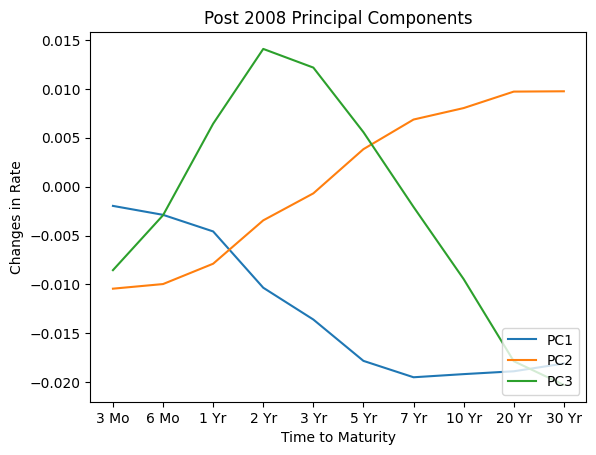

In [10]:
# Analyze the post 2008 subset
analysis_post = Analysis(df_post,'Post 2008', 10)
analysis_post.fit()
analysis_post.plot_explained_variance_ratio()
analysis_post.plot_components()

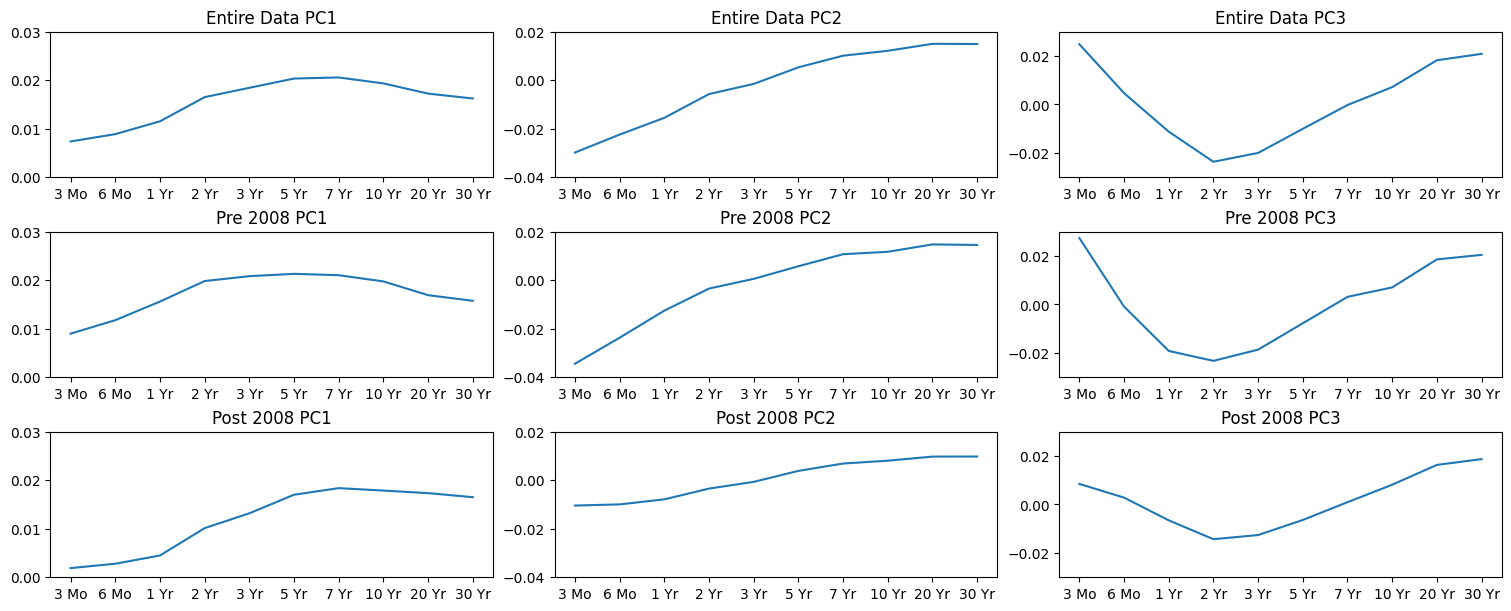

In [11]:
# Revise the compnents to make
analysis.pca.components_[:3][1] = -analysis.pca.components_[:3][1]
analysis_post.pca.components_[:3][0] = -analysis_post.pca.components_[:3][0]
analysis_post.pca.components_[:3][2] = -analysis_post.pca.components_[:3][2]

# Concatenate the title and components
arr_title = ['Entire Data','Entire Data','Entire Data',
             'Pre 2008','Pre 2008','Pre 2008',
             'Post 2008','Post 2008','Post 2008',]
arr_pc = np.concatenate((analysis.scaler.inverse_transform(analysis.pca.components_[:3]),
                analysis_pre.scaler.inverse_transform(analysis_pre.pca.components_[:3]),
                analysis_post.scaler.inverse_transform(analysis_post.pca.components_[:3])))

# Compare the components through subplots
idx = 0
fig, axs = plt.subplots(3, 3, figsize=(15, 6), layout='constrained')
for ax, pc, title in zip(axs.flat, arr_pc, arr_title):
    ax.set_title(f'{title} PC{idx+1}')
    if idx == 0:
      ax.set_ylim([0,0.03])
    elif idx == 1:
      ax.set_ylim([-0.04,0.02])
    else:
      ax.set_ylim([-0.03,0.03])

    ax.plot(df.columns, pc, label=f'PC{idx}')
    idx += 1
    idx %= 3